<a href="https://colab.research.google.com/github/reg4762/PVCK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 5
## Nama : Regita Delya Putri
## Absen : 21
## Nim : 2241720137
## Kelas : TI-3F


---



## Tugas Praktikum

### 1. Gamma Correction

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


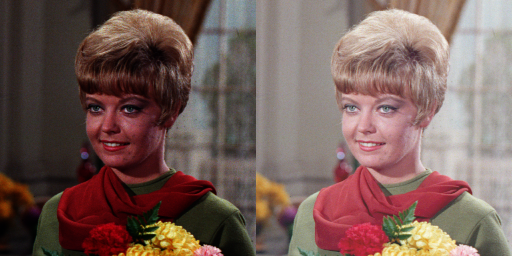

In [98]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK/Images/female.tiff')

gamma_corrected = np.array(255*(original / 255) ** (1.0 / gamma), dtype = 'uint8')

# Menampilkan gambar original dan gamma-corrected images
final_frame = cv.hconcat((original, gamma_corrected))
cv2_imshow(final_frame)


### 2. Image Depth

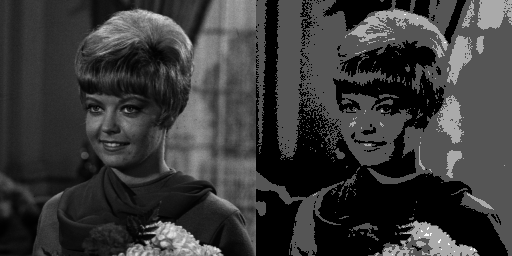

In [99]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/PVCK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
depth_image = np.round(original / level) * level

depth_image = depth_image.astype(original.dtype)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)


### 3. Average Denoising


In [21]:
import cv2 as cv
import glob

origin = cv.imread('/content/drive/MyDrive/PVCK/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Images/noises/*'):
    n = cv.imread(img)
    cv_img.append(n)

In [22]:
def average_denoising(jum):

  img_sum = cv_img[0]
  for i in range(1, jum):
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      image = cv_img[i]
      if image is not None:
          img_sum = cv.addWeighted(image, alpha, img_sum, beta, 0.0)

  return img_sum

In [23]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

*  Jumlah Citra di Average = 5



Nilai PSNR adalah 27.52916437287979 (dB)


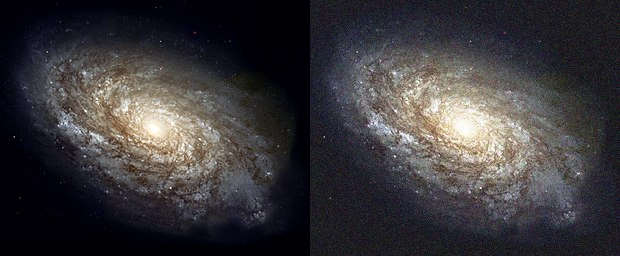

In [101]:
compressed = average_denoising(5)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

*   Jumlah Citra di Average = 10

Nilai PSNR adalah 27.54795332562729 (dB)


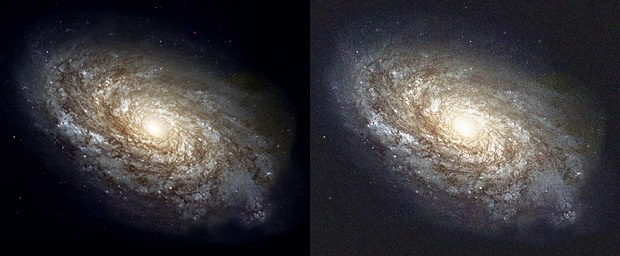

In [26]:
compressed = average_denoising(10)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

*   Jumlah Citra di Average = 20

Nilai PSNR adalah 27.54292590350461 (dB)


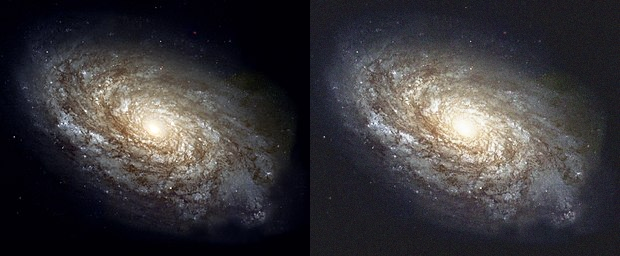

In [27]:
compressed = average_denoising(20)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

*   Jumlah Citra di Average = 40

Nilai PSNR adalah 27.505537681076753 (dB)


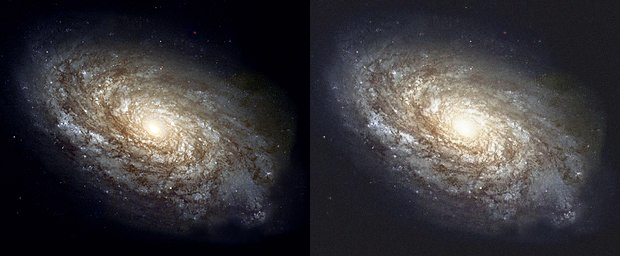

In [28]:
compressed = average_denoising(40)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

*   Jumlah Citra di Average = 80

Nilai PSNR adalah 27.502091669397135 (dB)


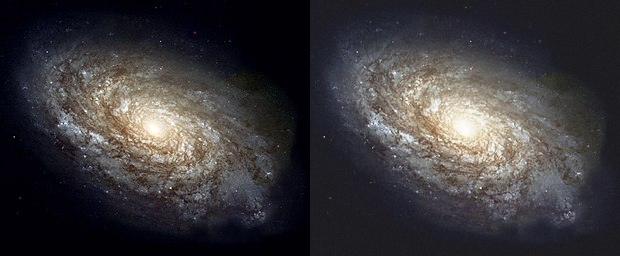

In [29]:
compressed = average_denoising(80)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

*   Jumlah Citra di Average = 100

Nilai PSNR adalah 27.50809857901977 (dB)


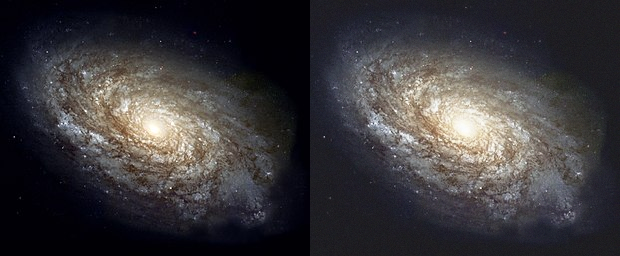

In [30]:
compressed = average_denoising(100)
psnr = PSNR(origin, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((origin, compressed))
cv2_imshow(galaxy_frame)

**Kesimpulan yang dapat diambil**

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah average denoising merupakan metode yang efektif untuk mereduksi noise dalam gambar. Semakin banyak citra noise yang digunakan, secara umum semakin baik kualitas gambar yang dihasilkan.Namun, perlu diperhatikan bahwa penambahan jumlah citra noise tidak selalu berbanding lurus dengan peningkatan kualitas, dan ada batas tertentu di mana penambahan citra noise mungkin tidak memberikan peningkatan yang signifikan.

### 4. Image Masking


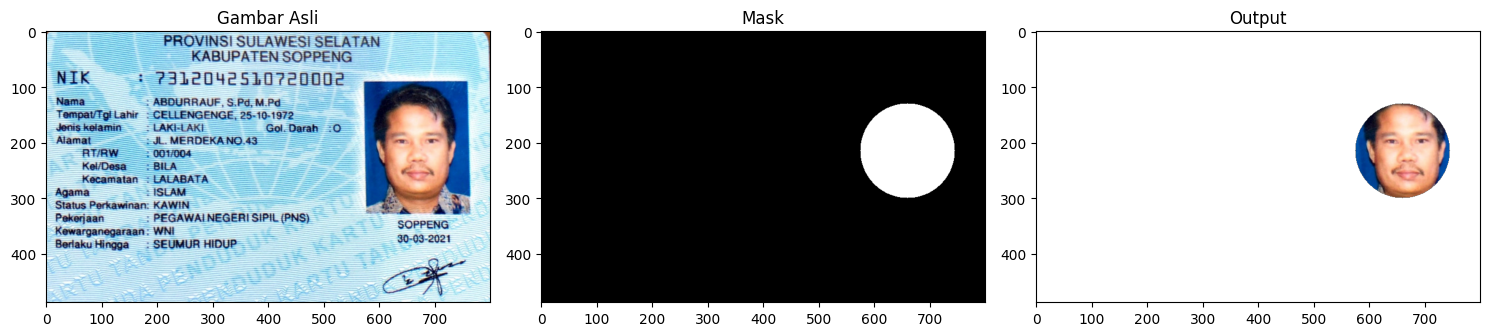

In [79]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros(ktp.shape[:2], dtype="uint8")

center_coordinates = (660, 215)
radius = 85
color = 255
thickness = -1
cv2.circle(mask, center_coordinates, radius, color, thickness)

masked_ktp= cv2.bitwise_and(ktp, ktp, mask=mask)

gray_image = cv2.cvtColor(masked_ktp, cv2.COLOR_BGR2GRAY)

_, alpha_channel = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)

blue_channel, green_channel, red_channel = cv2.split(masked_ktp)

rgba_image = cv2.merge([blue_channel, green_channel, red_channel, alpha_channel])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rgba_image, cv2.COLOR_BGRA2RGBA))
plt.title('Output')

plt.tight_layout()
plt.show()


### 5. Image Masking Menggunakan Operator Lain

*   NOT (Komplemen)






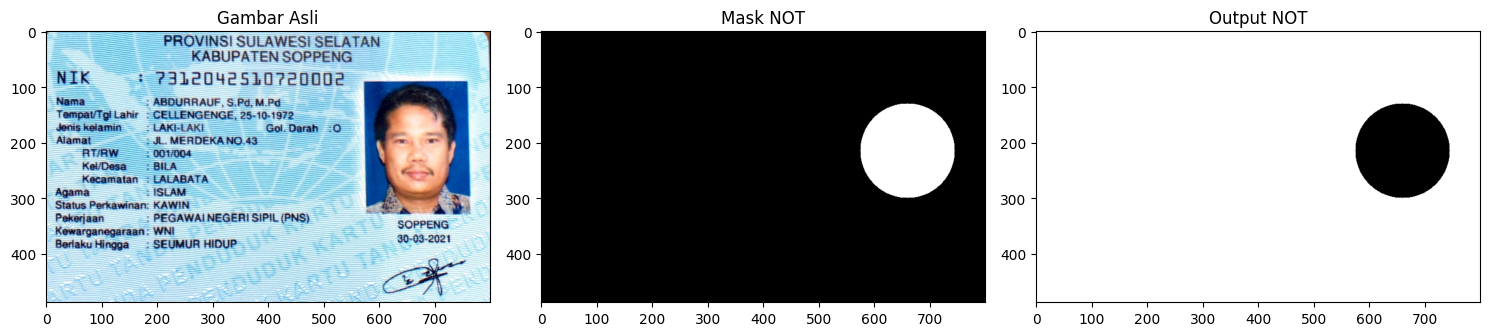

In [102]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros(ktp.shape[:2], dtype="uint8")

center_coordinates = (660, 215)
radius = 85
color = 255
thickness = -1
cv.circle(mask, center_coordinates, radius, color, thickness)

result = ~mask

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask NOT')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Output NOT')

plt.tight_layout()
plt.show()

*   OR (Atau)

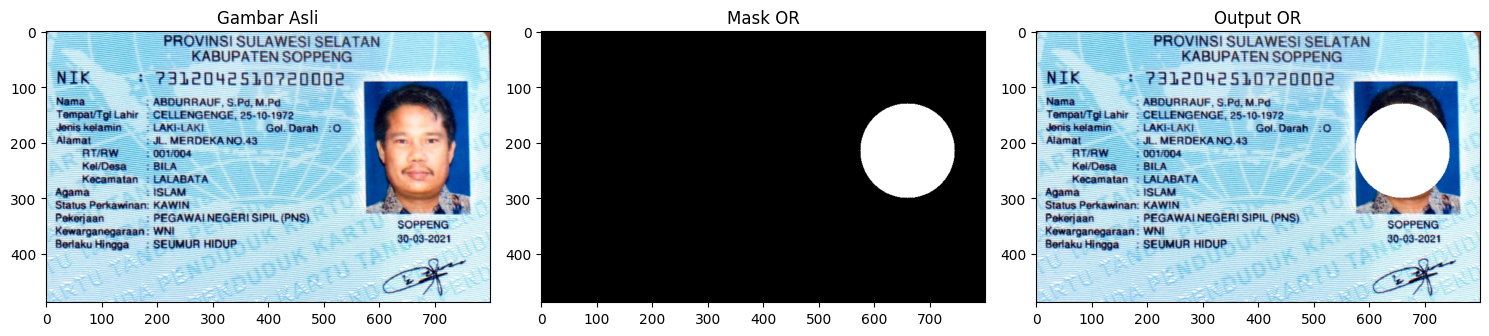

In [103]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros_like(ktp)

center_coordinates = (660, 215)
radius = 85
color = 255, 255, 255
thickness = -1
cv.circle(mask, center_coordinates, radius, color, thickness)

result = ktp | mask

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask OR')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Output OR')

plt.tight_layout()
plt.show()

*   AND (Dan)

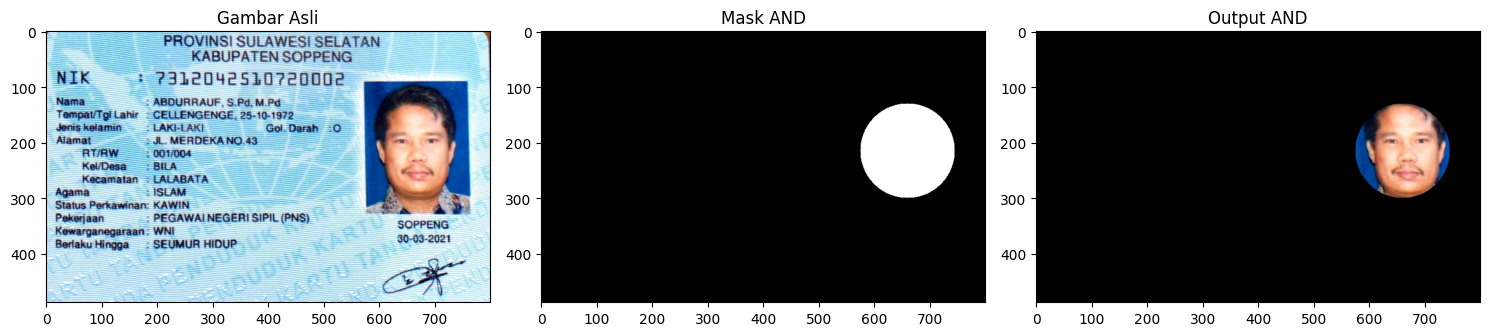

In [95]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros_like(ktp)

center_coordinates = (660, 215)
radius = 85
color = 255, 255, 255
thickness = -1
cv.circle(mask, center_coordinates, radius, color, thickness)

result = ktp & mask

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask AND')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Output AND')

plt.tight_layout()
plt.show()

*   NAND (Not And)

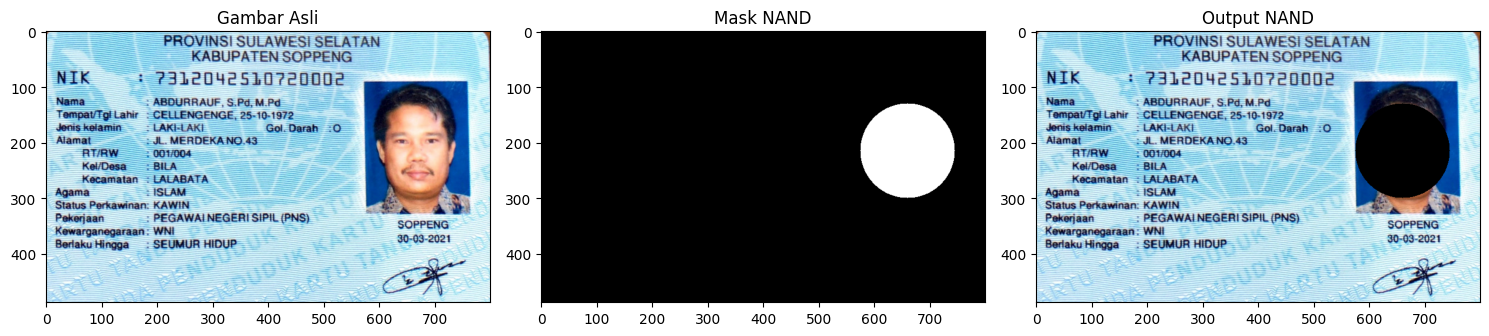

In [96]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros_like(ktp)

center_coordinates = (660, 215)
radius = 85
color = 255, 255, 255
thickness = -1
cv.circle(mask, center_coordinates, radius, color, thickness)

result = ktp & ~mask

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask NAND')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Output NAND')

plt.tight_layout()
plt.show()


*   XOR (Exlusive Or)

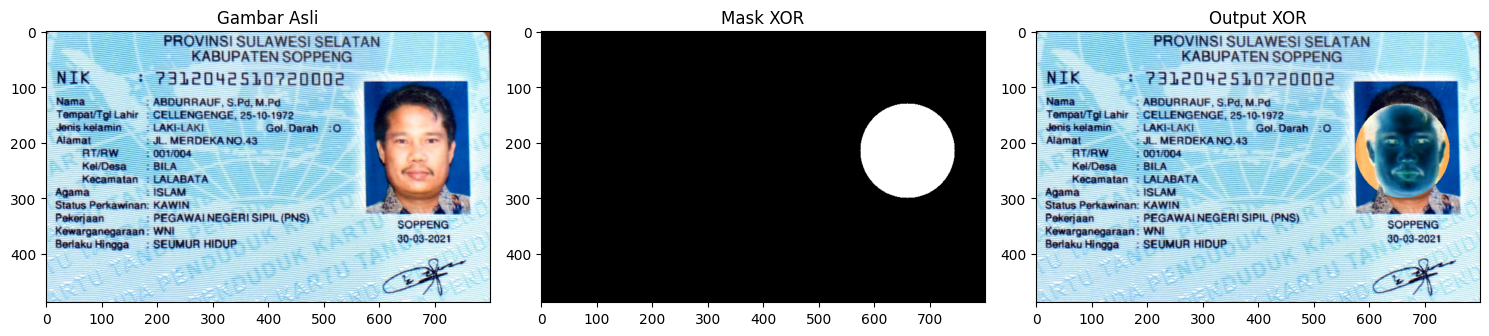

In [97]:
ktp = cv2.imread('/content/drive/MyDrive/PVCK/Images/KTP7.jpeg')

mask = np.zeros_like(ktp)

center_coordinates = (660, 215)
radius = 85
color = 255, 255, 255
thickness = -1
cv.circle(mask, center_coordinates, radius, color, thickness)

result = ktp ^ mask

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask XOR')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Output XOR')

plt.tight_layout()
plt.show()

**Kesimpulan mengenai kelima operator masking**

1. AND (&):
  - Menggabungkan dua gambar, menghasilkan piksel yang berwarna putih hanya pada area di mana kedua gambar memiliki piksel putih.
  - Efeknya adalah memotong bagian gambar yang tidak tertutupi oleh mask.

2. OR (|):
  - Menggabungkan dua gambar, menghasilkan piksel yang berwarna putih jika salah satu atau kedua gambar memiliki piksel putih.
  - Efeknya adalah menggabungkan bagian gambar yang tertutupi oleh mask dengan gambar asli.

3. XOR (^):
  - Menggabungkan dua gambar, menghasilkan piksel yang berwarna putih jika hanya salah satu gambar memiliki piksel putih, tetapi tidak keduanya.
  - Efeknya adalah membalikkan warna pada area yang tertutupi oleh mask, hanya pada bagian yang tidak ada di gambar asli.

4. NOT (~):
  - Membalikkan warna gambar. Piksel hitam menjadi putih, dan putih menjadi hitam.
  - Efeknya adalah membuat mask menjadi kebalikannya, hitam menjadi putih dan sebaliknya.

5. NAND (~&):
  - Kombinasi AND dan NOT. Menghasilkan piksel yang berwarna putih hanya pada area di mana salah satu gambar memiliki piksel putih, dan gambar lainnya tidak memiliki piksel putih.
  - Efeknya adalah memotong bagian gambar yang tertutupi oleh mask, dan meninggalkan bagian yang tidak tertutupi.


Secara umum, operator-operator ini berguna untuk memanipulasi gambar dengan tepat,
dan dapat digunakan untuk berbagai macam tugas seperti ekstraksi fitur, segmentasi, dan pengeditan gambar.
